# Data Analysis

## Libary importation

In [1]:
# Traitement de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv("X_train_NHkHMNU.csv")
y = pd.read_csv("y_train_ZAN5mwg.csv")

# Merge both datasets
df = pd.concat([X, y], axis=1)

# Drop the second-to-last column if needed
df = df.drop(df.columns[-2], axis=1)
df = df.sort_values("DAY_ID")

In [3]:
df

,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
742,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,-0.650577,...,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.108953
1211,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,-0.778627,...,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,-0.063369
1408,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,2.575976
1468,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.861270
329,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,0.612133,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.068905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1212,FR,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,0.789824,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.425474
986,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,0.789824,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.144320
1465,1213,DE,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,0.069222,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,0.147587
873,1213,FR,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,0.069222,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,-3.003988


## Univariate Data Analysis

The first step of a data analysis is the univariate analysis.

The aim of this part is to study the behavior the each variable independently to better understand their distribution, features, quality...

This will be useful to gather meaningful information useful for feature engineering.

### Study of the target variable `TARGET`

The variable we are interested in is called in the dataset `TARGET`. It represents, the variation of the price of futures contracts of electricity in France and Germany.

In [4]:
# Descriptive statistics
print("Target variable's description : \n", df['TARGET'].describe(), "\n")

Target variable's description : 
 count    1494.000000
mean        0.089934
std         1.034582
min        -6.519268
25%        -0.219861
50%         0.000000
75%         0.269719
max         7.786578
Name: TARGET, dtype: float64 



d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


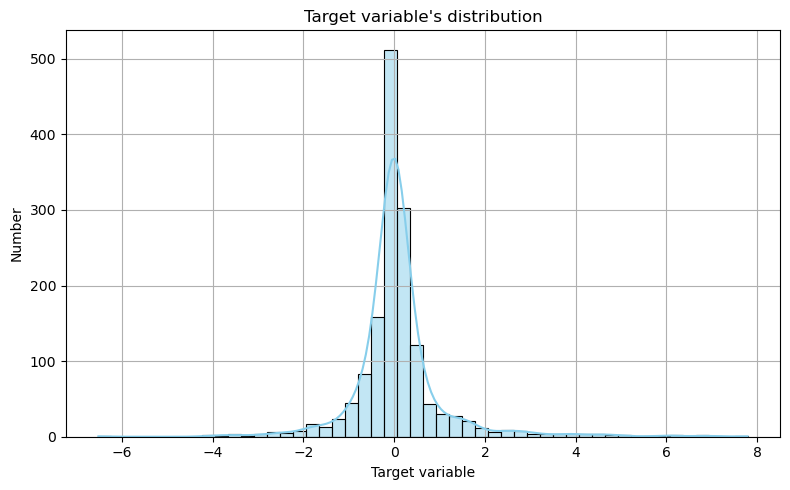

In [5]:
# Histogram distribution

plt.figure(figsize=(8, 5))
sns.histplot(df["TARGET"], bins=50, kde=True, color="skyblue")
plt.title("Target variable's distribution")
plt.xlabel("Target variable")
plt.ylabel("Number")
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**

This graph shows the distribution of the target variable. At first glance, the shape appears approximately Gaussian, with values relatively concentrated around 0.

However, the target variable description reveals that the target variable is not perfectly centered nor reduced:
- mean = 0.089934
- standard deviation = 1.034582

Although these values are close to the ideal (0 and 1), the slight deviations indicate that the distribution is only approximately standardized, not exactly.

### Differences between the French and German values

Let's study the difference between the price variation (target variable) of the french and german price :

In [6]:
# define two different datasets
df_fr = df[df["COUNTRY"] == "FR"].copy()
df_de = df[df["COUNTRY"] == "DE"].copy()

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


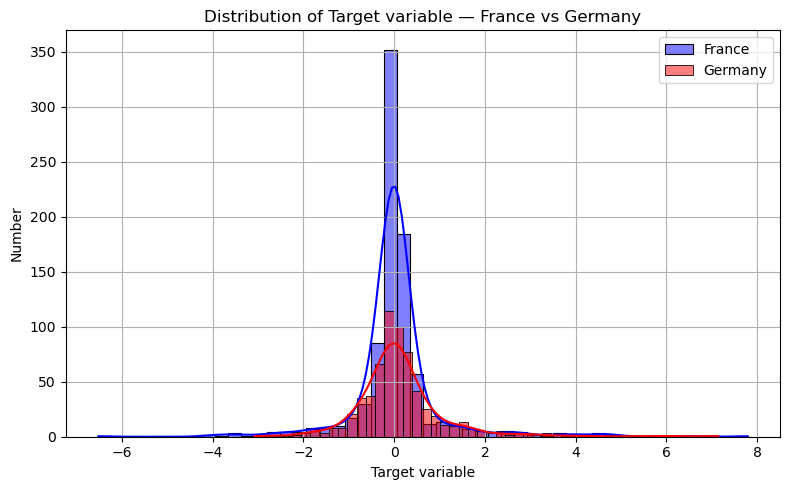

In [7]:
# Histogram distribution
plt.figure(figsize=(8, 5))

sns.histplot(df_fr["TARGET"], bins=50, kde=True, color="blue", label="France", alpha=0.5)
sns.histplot(df_de["TARGET"], bins=50, kde=True, color="red", label="Germany", alpha=0.5)

plt.title("Distribution of Target variable — France vs Germany")
plt.xlabel("Target variable")
plt.ylabel("Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**

This graph displays the raw distribution of the target variable for France and Germany.
The french datasset shows a narrow, high-peaked distribution centered close to zero, indicating lower variance and fewer extreme values.
The german dataset's distribution is wider and flatter, showing higher dispersion and more outliers.

Overall, Germany’s values are more spread out, while France’s target variable is tightly clustered around the mean.

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


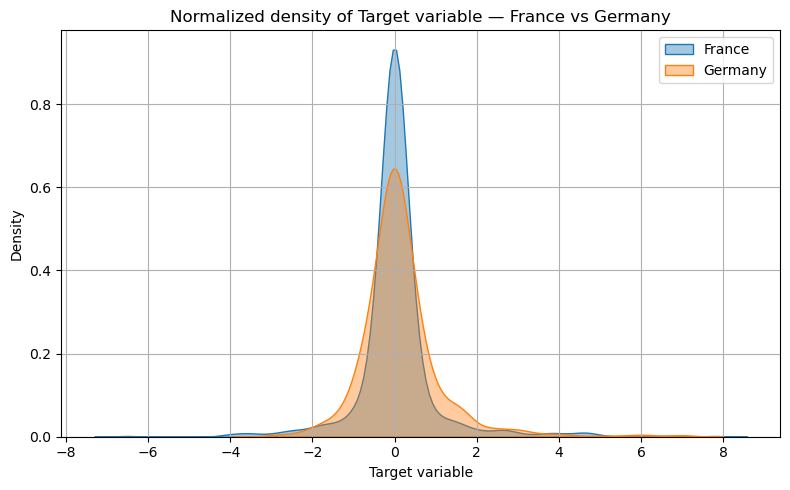

In [8]:
plt.figure(figsize=(8, 5))

sns.kdeplot(df_fr["TARGET"], label="France", fill=True, alpha=0.4)
sns.kdeplot(df_de["TARGET"], label="Germany", fill=True, alpha=0.4)

plt.title("Normalized density of Target variable — France vs Germany")
plt.xlabel("Target variable")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations**

After normalization, both distributions are aligned around zero with comparable central peaks.
France still displays a more concentrated density, whereas Germany keeps a broader shape, although reduced compared to the raw data.

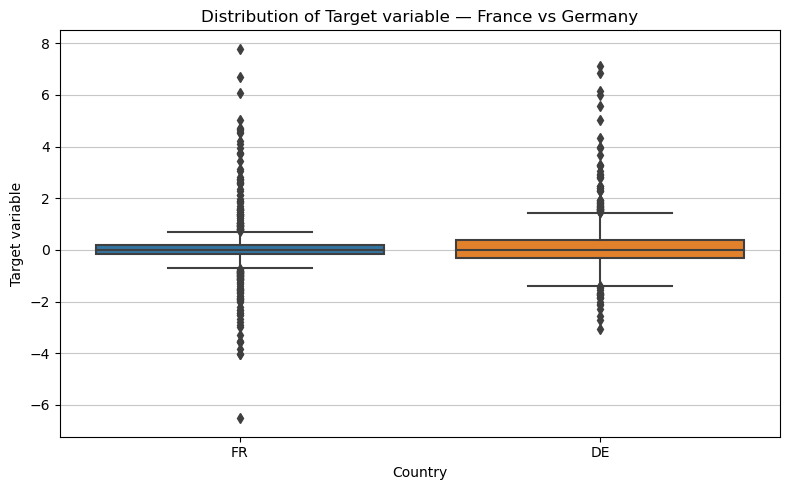

In [9]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df[df["COUNTRY"].isin(["FR", "DE"])],
    x="COUNTRY",
    y="TARGET"
)

plt.title("Distribution of Target variable — France vs Germany")
plt.xlabel("Country")
plt.ylabel("Target variable")
plt.grid(True, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


**Observations**

This graph represents thet bowplot of the french and german target variable. We can notice that the german's target variable has a wider spread and a larger interquartile range than the french dataset.

Overall, the French distribution is more compact, whereas the German dataset is more dispersed.

Moreover, both countries show **outliers**, but Germany displays more numerous mid-range outliers, while France shows more extreme ones.

**Why the French Dataset Is Less Dispersed than the German One - Energy Mix Differences**

A possible hypothesis for why the French target variable shows less dispersion than the German one is the difference in each country's energy mix.
France’s electricity production relies heavily on nuclear energy, which provides a stable and predictable output and is less sensitive to short-term external factors such as weather conditions (temperature, wind, sunlight).

Germany, on the other hand, depends much more on variable renewable sources such as wind (onshore and offshore) and solar power. These sources are more dependent on environmental conditions, leading to greater fluctuations in production.

This structural difference in energy mix generation could explain why the French dataset appears more concentrated, while the German one is more spread out.

**Outliers**

It is important to note these outliers, as they will need to be dealt with during the feature-engineering phase to improve model efficiency.

In [10]:
df

,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
742,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,-0.650577,...,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.108953
1211,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,-0.778627,...,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,-0.063369
1408,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,2.575976
1468,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.861270
329,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,0.612133,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.068905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1212,FR,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,0.789824,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.425474
986,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,0.789824,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.144320
1465,1213,DE,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,0.069222,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,0.147587
873,1213,FR,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,0.069222,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,-3.003988


Let's take a look at one specific day :

In [11]:
df[df["DAY_ID"] == 2]

,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
1408,2,FR,-0.068972,-0.66739,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.3446,-0.372156,-0.623041,-0.926064,-0.14895,0.641235,1.80255,1.14092,0.900434,2.575976
1468,2,DE,-0.068972,-0.66739,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.3446,-0.372156,-0.623041,-0.926064,-0.14895,0.641235,1.80255,1.14092,0.900434,0.861270


For a same given day (same day `DAY_ID`), the dataset gives the target variable for both France and Germany, meaning that there are two rows : one for each country. We can note that those twos rows have the exact same features' value (except for the country and the target variable).
This can be observed in the dataframe extract shown above, for example for `DAY_ID`=2.

So the features' value are duplicated into two rows when they have the same `DAY_ID`. Thus, we can make the following hypothesis :

If there are duplications for each day (one df_france, one Germany), we don't have to do two different univariate data analyses, one for each dataset as they would be the same.

Let's check that statement :

In [12]:
df_fr = df[df["COUNTRY"] == "FR"].sort_values("DAY_ID")
df_de = df[df["COUNTRY"] == "DE"].sort_values("DAY_ID")

In [13]:
print("Number of days for df_french's dataset : ", len(df_fr))
print("Number of days for German's dataset : ", len(df_de))

Number of days for df_french's dataset :  851
Number of days for German's dataset :  643


**Observations**

We can see that the french dataset is much larger than the german one. Thus it means there are singletons, and not only duplications. Thus we have to do two separate study for the french and german datasets.

**Conclusion**

This study highlights several key differences between the French and German datasets:
- Germany shows a wider distribution of the target variable
- France displays more extreme outliers.
- Some days contain duplicate feature rows (one per country).
- The French dataset contains more observations than the German one.

Based on these observations, we can conclude that::

**Going forward with the analysis and modelling, the dataset will be split into two independent subsets, one for each country.**

### French dataset Analysis

As we separated the dataset into two different datasets for each country, we don't need the `COUNTRY`variable anymore. We can drop this feature :

In [14]:
df_fr.drop(columns=["COUNTRY"], inplace=True)

#### Study of the missing values

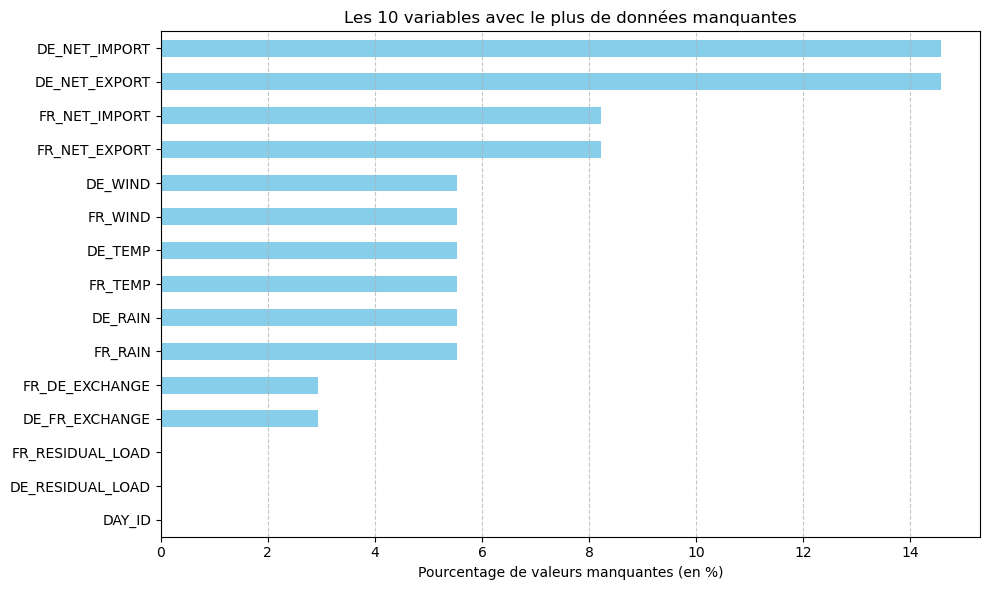

In [15]:
# percentage of missing values per column
missing_values = df_fr.isnull().mean() * 100

# top 15 of columns with the most missing values
top_15_colonnes = missing_values.sort_values(ascending=False).head(15)

# Horizontal barplot
plt.figure(figsize=(10, 6))
top_15_colonnes.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Pourcentage de valeurs manquantes (en %)")
plt.title("Les 10 variables avec le plus de données manquantes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations**

12 features have missing values whose percentage range from ~3% to ~14.5%.

For futures steps, we need find a way to eliminate those missing values. Here are the possibilities :
- drop the column
- apply median or mean
- drop the rows where there is a missing value

#### Study of the distribution of each features

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

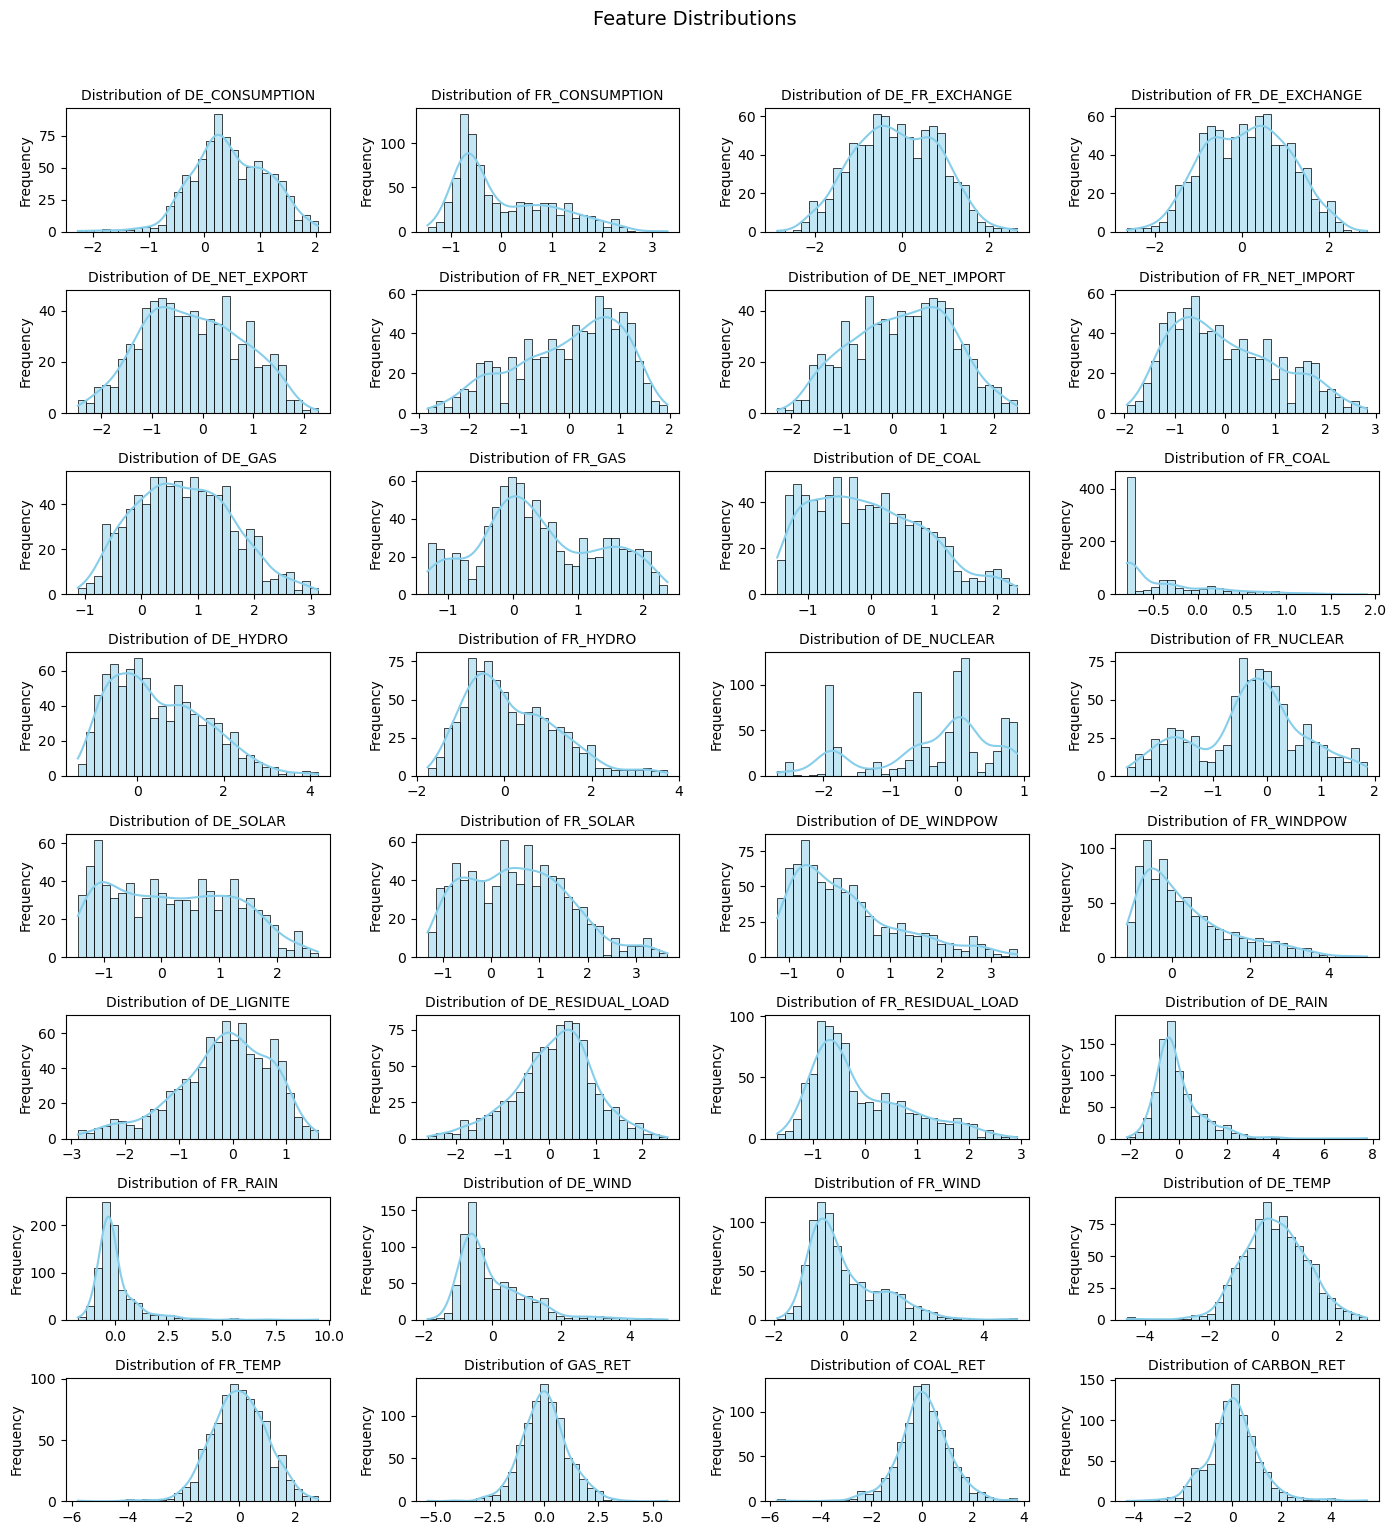

In [16]:
features = df_fr.drop(columns=["DAY_ID", "TARGET"]).columns

# Plot distributions
plt.figure(figsize=(14, 15))
for i, col in enumerate(features, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df_fr[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.suptitle("Feature Distributions", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

**Observations**

This reprensentation shows the distribution of each feature.

Most features appear to be centered around 0. We can also observe that a preprocessing step has already been applied: the majority of features fall within a small range (approximately from –5 to 5).
Indeed, some feature ranges are not consistent with their expected physical meaning. For example, the temperature for France (last graph on the left) only varies between –2 and 2, which is unusually narrow for real-world temperature data. This suggests that an additional transformation or normalization has been applied prior to this dataset.

In addition, we can note that the `FR_COAL` values are not diversified (graph on the third row and last column), most of the values are mostly the same. It could be interesting to drop this column in the feature engineering part as it will not provide any meaninful information. 

Moerover, 2 variables are noticeable : `FR_NUCLEAR` et `FR_GAS`. Their distributions exhibit three distinct clusters or threshold levels, as illustrated in the following graphs.

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


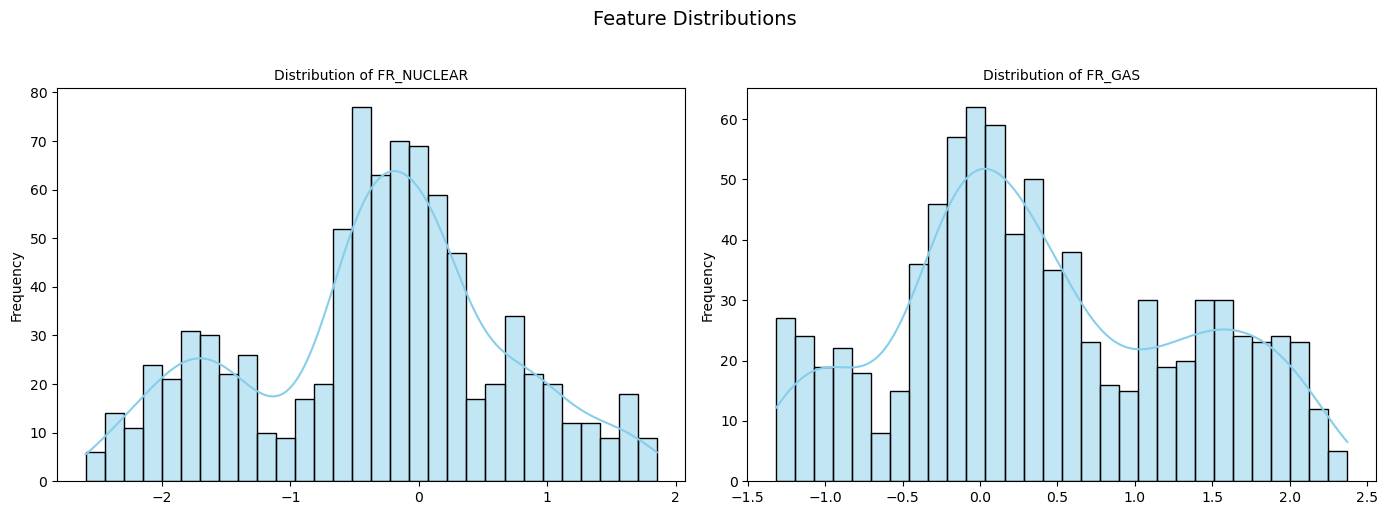

In [17]:
# Plot distributions
plt.figure(figsize=(14, 5))
for i, col in enumerate(["FR_NUCLEAR", "FR_GAS"], 1):
    plt.subplot(1, 2, i)
    sns.histplot(df_fr[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.suptitle("Feature Distributions", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

The tiered structure observed in `FR_NUCLEAR` and `FR_GAS` likely reflects different operating regimes (baseline, reduced production, peak demand), which vary depending on the day and system conditions.

This point is supported by the article "Energy Transition in France" written by Badr Eddine Lebrouhi,Eric Schall, Bilal Lamrani and Chaibi Yassine. This article delves into the french plan to significantly increase the contribution of renewable energy in its energy mix.

### Duplicates

We first checked for duplicates in the initial dataset, which led us to split it into two separate subsets: one for France and one for Germany.

We now need to verify whether there are duplicates within each of these sub-datasets.

In [18]:
temp = df_fr.drop(columns=["DAY_ID"])
print(f"Number of duplicate rows in df_fr: {temp.duplicated().sum()}")

Number of duplicate rows in df_fr: 0


There are no duplicates in the french dataset.

### German Dataset analysis

In [19]:
df_de.drop(columns=["COUNTRY"], inplace=True)

#### Study of the missing values

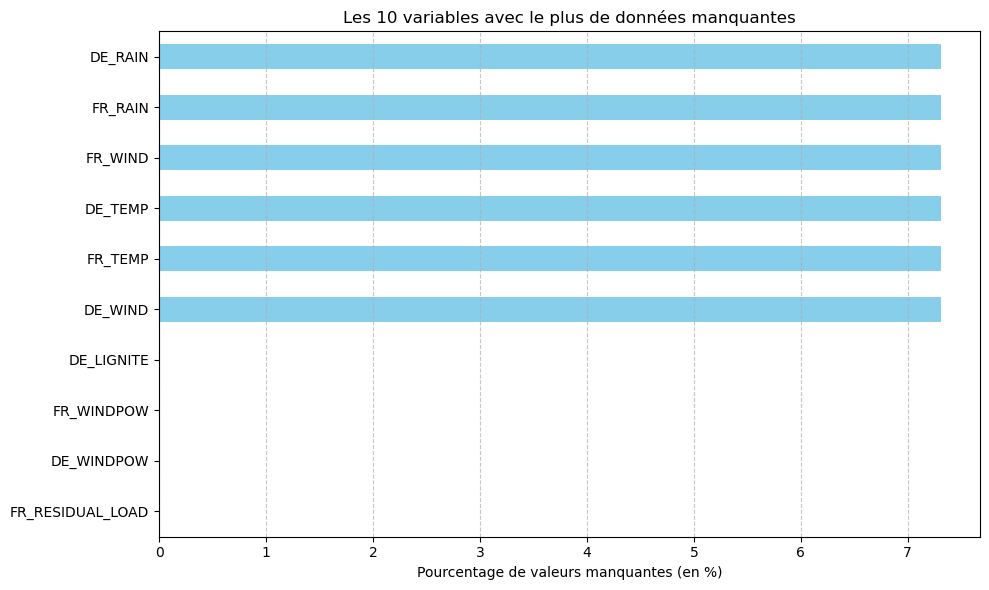

In [20]:
# percentage of missing values per column
missing_values = df_de.isnull().mean() * 100

# top 10 of columns with the most missing values
top_10_colonnes = missing_values.sort_values(ascending=False).head(10)

# Horizontal barplot
plt.figure(figsize=(10, 6))
top_10_colonnes.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Pourcentage de valeurs manquantes (en %)")
plt.title("Les 10 variables avec le plus de données manquantes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations**

6 features have missing values whose percentage are around 7.5%.

As with the french dataset, we need find a way to eliminate those missing values. Here are the possibilities :
- drop the column
- apply median or mean
- drop the rows where there is a missing value

#### Study of the distribution of each features

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

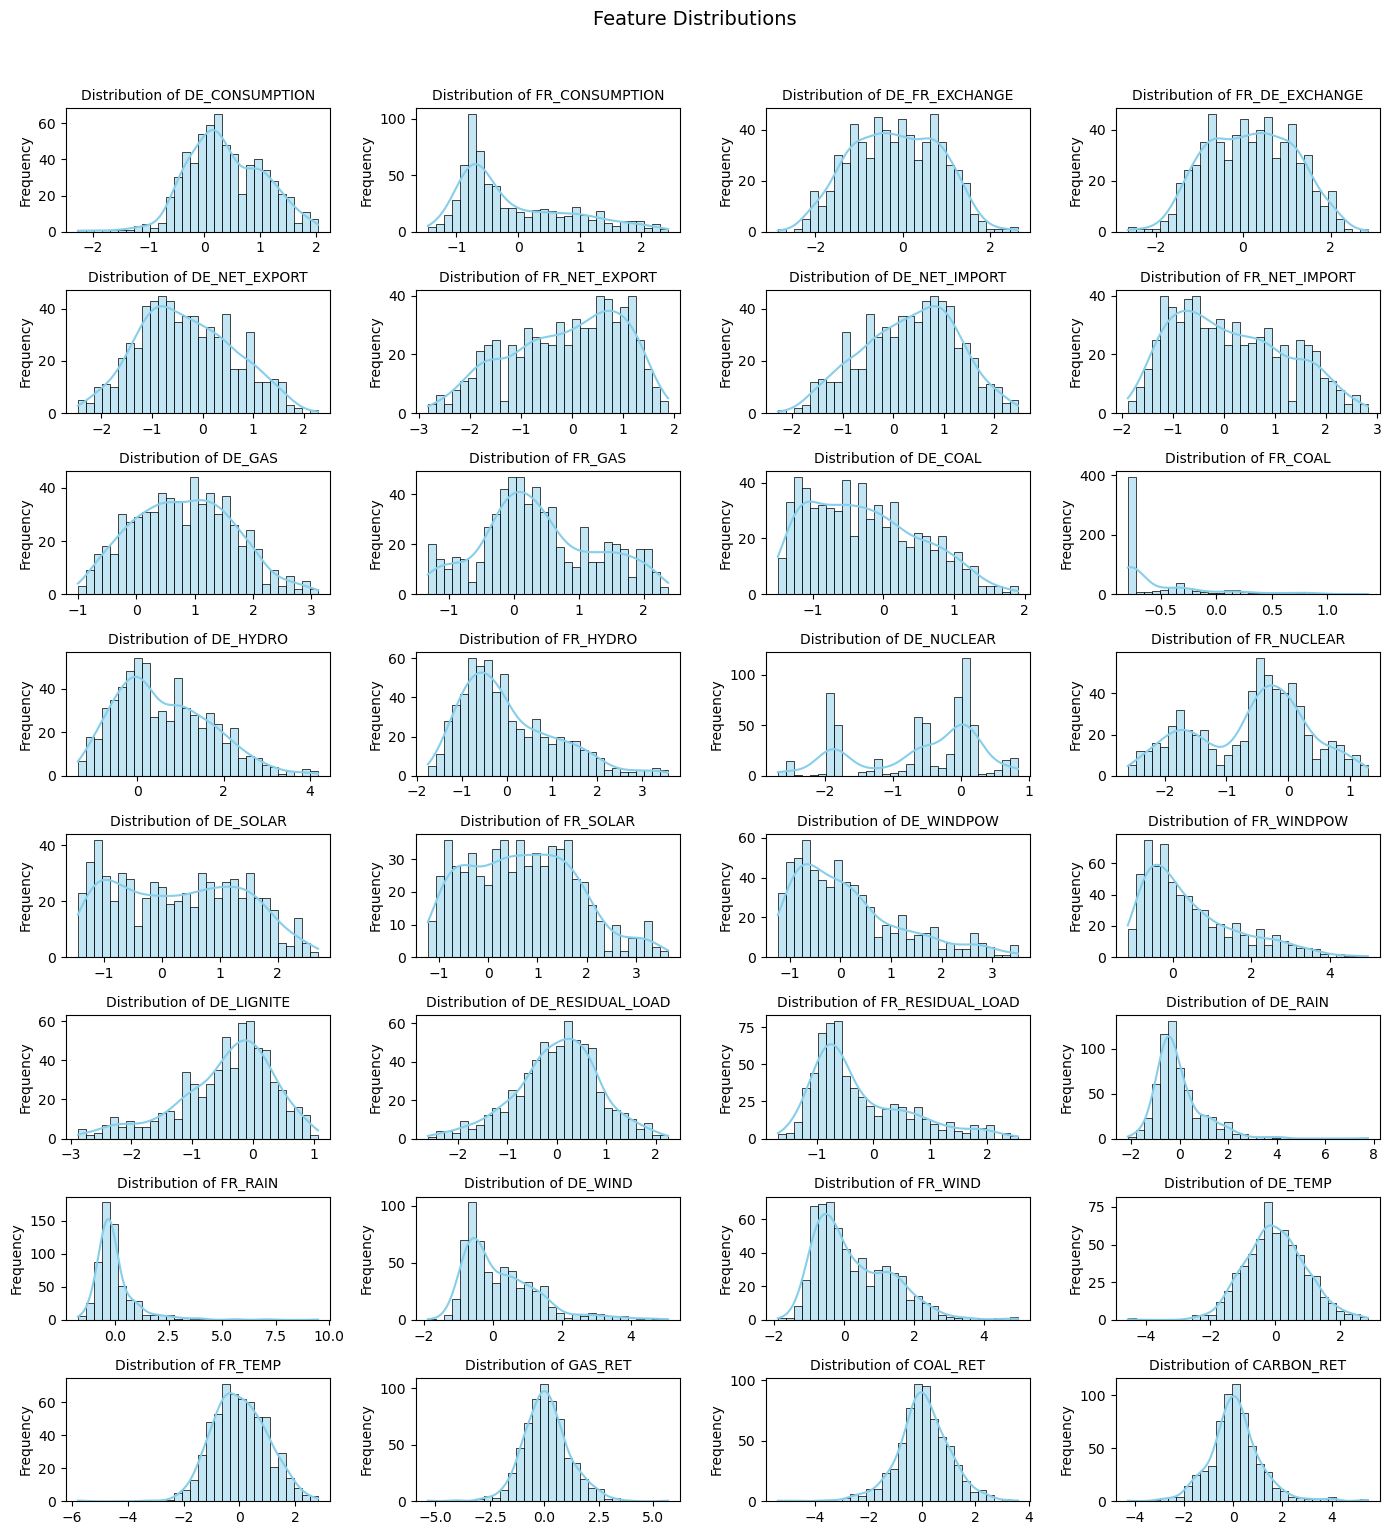

In [21]:
features = df_de.drop(columns=["DAY_ID", "TARGET"]).columns

# Plot distributions
plt.figure(figsize=(14, 15))
for i, col in enumerate(features, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df_de[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.suptitle("Feature Distributions", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

**Observations**

Since the French and German datasets share many identical feature values, the overall feature distributions are very similar in both cases. We can therefore draw the same conclusions as for the French dataset:
- prior preprocessing has clearly been applied to the feature values
- `FR_COAL` variable shows very limited variability
- distinct clusters are observed for `FR_NUCLEAR` and `FR_GAS`

#### Duplicates

In [22]:
temp = df_de.drop(columns=["DAY_ID"])
print(f"Number of duplicate rows in df_de: {temp.duplicated().sum()}")

Number of duplicate rows in df_de: 0


There are no duplicates.